In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving marketing_data.csv to marketing_data.csv
User uploaded file "marketing_data.csv" with length 227054 bytes


In [3]:
# Load dataset
df = pd.read_csv('marketing_data.csv').iloc[: , 1:]

In [4]:
# Rename Pandas columns to lower case
df.columns = df.columns.str.lower()

In [5]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
# Examine the data
df.head()

In [8]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year_birth           2240 non-null   int64 
 1   education            2240 non-null   object
 2   marital_status       2240 non-null   object
 3    income              2216 non-null   object
 4   kidhome              2240 non-null   int64 
 5   teenhome             2240 non-null   int64 
 6   dt_customer          2240 non-null   object
 7   recency              2240 non-null   int64 
 8   mntwines             2240 non-null   int64 
 9   mntfruits            2240 non-null   int64 
 10  mntmeatproducts      2240 non-null   int64 
 11  mntfishproducts      2240 non-null   int64 
 12  mntsweetproducts     2240 non-null   int64 
 13  mntgoldprods         2240 non-null   int64 
 14  numdealspurchases    2240 non-null   int64 
 15  numwebpurchases      2240 non-null   int64 
 16  numcat

In [9]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [10]:
# Transform income column to a numerical
df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')

<ipython-input-10-9894eb322af8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace(',','').str.replace('$','').astype('float')


In [11]:
import datetime 

In [12]:
current_year = datetime.date.today().year
current_year

2022

In [13]:
# Replace 'year_birth' with 'age'
df['age'] = current_year - df['year_birth']

In [14]:
# Modify date of enrollment to total number of months since enrollment
df['enrollment_month'] = (pd.to_datetime('now') - pd.to_datetime(df['dt_customer'])) // np.timedelta64(1,'M')  

In [15]:
# Rename the column 'response'
df = df.rename(columns = {'response': 'acceptedcmp6'})

In [16]:
# Drop unnecessary columns
df = df.drop(['year_birth', 'dt_customer'], axis = 1)

In [17]:
df.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,acceptedcmp6,complain,age,enrollment_month
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,53.194196,113.154464
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069,6.627947
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,102.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,107.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,113.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,119.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,125.000000


In [18]:
!pip install gitly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 132 kB/s 
  Created wheel for gitly: filename=gitly-1.1.4-py3-none-any.whl size=4525 sha256=7a2467863d4742f3373fe9f1e0d7c1eae489a476741211166a1ab9270fb0ebe1
  Stored in directory: /root/.cache/pip/wheels/54/21/4c/a87ca104a4a1d849e46681418c05fe9e8d6a64380505ce4242
Successfully built gitly


In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from gitly.colab.plot import GitlyPlotter

In [20]:
gitly = GitlyPlotter('github')

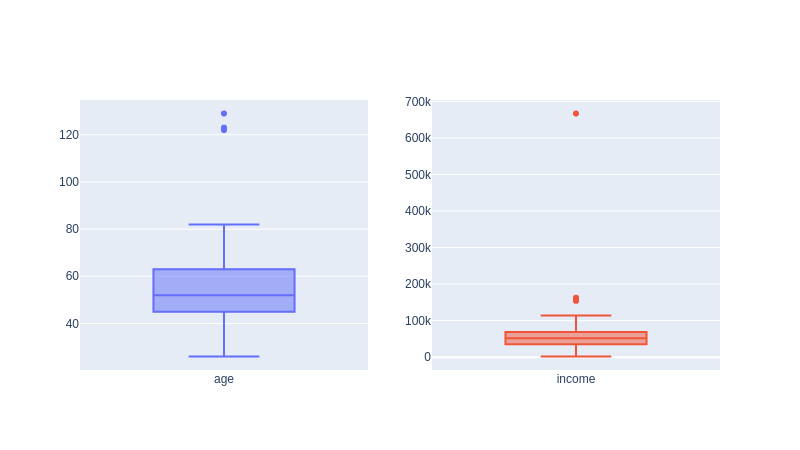

In [21]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Box(y = df['age'], name = 'age'), row = 1, col = 1)
fig.add_trace(go.Box(y = df['income'], name = 'income'), row = 1, col = 2)

fig.update_layout(showlegend = False)

gitly.show(fig)

У нас есть 4 клиента, которые являются исключениями. Один из них зарабатывает 666 666 долларов США, а троим из них больше 100 лет!

In [22]:
# Find outliers
outliers_age = df[df['age'] > 100].index

# Remove outliers
df.drop(outliers_age, inplace = True)

In [23]:
# Find outlier
outliers_income = df[df['income'] > 200000].index

# Remove outlier
df.drop(outliers_income, inplace = True)

In [24]:
df['education'].value_counts()

graduation    1126
phd            485
master         370
2n cycle       201
basic           54
Name: education, dtype: int64

С точки зрения образования, и «2-й цикл», и «магистр» относятся к одному и тому же уровню образования. Это основано на Европейском пространстве высшего образования (EHEA). Поэтому мы объединим два уровня образования под словом «магистр». Кроме того, «выпускной» немного вводит в заблуждение как уровень образования. Мы предположим, что это относится к «бакалавриату» и перефразируем его как таковое.

In [25]:
# Replace '2n cycle' with 'master'
df['education'] = df['education'].apply(lambda x: 'master' if str(x) == '2n cycle' else str(x))

In [26]:
# Replace 'graduation' with 'undergraduate'
df['education'] = df['education'].apply(lambda x: 'undergraduate' if str(x) == 'graduation' else str(x))

In [27]:
df['marital_status'].value_counts()

married     864
together    578
single      479
divorced    231
widow        77
alone         3
yolo          2
absurd        2
Name: marital_status, dtype: int64

In [28]:
# Merge 'yolo', 'absurd', and 'alone' under 'single'
df['marital_status'] = df['marital_status'].apply(lambda x: 'single' if str(x) in ['alone', 'yolo', 'absurd'] else str(x))

In [29]:
df['country'].value_counts()

sp     1094
sa      335
ca      268
aus     160
ind     147
ger     120
us      109
me        3
Name: country, dtype: int64

# Просмор пропущенных значений


In [30]:
df.isnull().sum()

education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
acceptedcmp6            0
complain                0
country                 0
age                     0
enrollment_month        0
dtype: int64

In [31]:
X = df.drop('numstorepurchases', axis = 1)

In [32]:
y = df['numstorepurchases']

# Создание тестовых и обучающих данных

In [33]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [36]:
transformer = ColumnTransformer(transformers = [('simple_imputer', SimpleImputer(strategy = 'median'), ['income'])], remainder = 'passthrough')

# Исследуем коллинеарность

Включение функций, которые сильно коррелируют друг с другом или являются мультиколлинеарными, добавляет шум и неточность, поэтому нам нужно попытаться уменьшить это.

Создание тепловой карты корреляции — хороший способ визуализировать потенциальную коллинеарность. Эмпирическое правило состоит в том, что если корреляция между двумя независимыми переменными больше 0,8, тогда будет существовать мультиколлинеарность.

In [37]:
X_tr = transformer.fit_transform(X_train)

In [38]:
X_tr = pd.DataFrame(data = X_tr, columns = X.columns)

In [42]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor

In [44]:
numeric_columns = list(X_train.select_dtypes(exclude = ['object']).columns.values.tolist())
categorical_columns = list(X_train.select_dtypes(include = ['object']).columns.values.tolist())
numeric_transformer = Pipeline(steps = [('simple_imputer', SimpleImputer(strategy = 'median'))])
categorical_transformer = Pipeline(steps = [('one_hot_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, numeric_columns),
                                                 ('categorical', categorical_transformer, categorical_columns)], remainder = 'passthrough')

bundled_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('scaler', RobustScaler()),
                                     ('model', CatBoostRegressor(silent = True, random_state = 42))])

In [45]:
bundled_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['income', 'kidhome',
                                                   'teenhome', 'recency',
                                                   'mntwines', 'mntfruits',
                                                   'mntmeatproducts',
                                                   'mntfishproducts',
                                                   'mntsweetproducts',
                                                   'mntgoldprods',
                                                   'numdealspurchases',
                                                   'numwebpurchases',
               

In [46]:
y_pred = bundled_pipeline.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
mean_absolute_error(y_test, y_pred)

1.1291579556276699

# ELI5

Из этого пайплайна непросто извлечь важные функции. Однако есть библиотека python, которая делает это очень простым, под названием ELI5.

Давайте используем ELI5 для извлечения важности функций из конвейера.

ELI5 необходимо знать все имена функций, чтобы определить важность функций. Применяя однократное кодирование к категориальным переменным в конвейере, мы вводим ряд новых функций. Поэтому сначала нам нужно извлечь эти имена функций и добавить их к известному списку числовых функций. В приведенном ниже коде для этого используется функция named_steps, встроенная в конвейеры scikit-learn.

In [49]:
one_hot_columns = list(bundled_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['one_hot_encoder'].get_feature_names_out(input_features = categorical_columns))

In [50]:
numeric_features_list = list(numeric_columns)
numeric_features_list.extend(one_hot_columns)

In [51]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.3 MB/s 
     |████████████████████████████████| 133 kB 56.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6bb9b3415063a3f0883d1f25983b1084ee71729f1bbc2c62b1877ae7b89d4128
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [52]:
import eli5

In [53]:
eli5.explain_weights(bundled_pipeline.named_steps['model'], top = 50, feature_names = numeric_features_list)

Weight,Feature
0.2253,mntwines
0.1130,mntmeatproducts
0.0708,income
0.0696,numcatalogpurchases
0.0619,mntsweetproducts
0.0598,mntfishproducts
0.0579,mntfruits
0.0467,numwebpurchases
0.0398,numwebvisitsmonth
0.0373,mntgoldprods


Здесь мы отмечаем, что «mntwines» и «mntmeatproducts» являются наиболее важными функциями.

**Важные замечание**

* Чем точнее модель, тем надежнее рассчитанные значения важности.

* Вычисленные значения важности описывают, насколько важны функции для модели CatBoostRegressor. Это приблизительное представление о том, насколько важны функции в данных.

# С точки зрения общего объема покупок дела в США значительно лучше, чем в остальном мире?

In [54]:
totalpurchases = df[['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'country']]

In [55]:
# Calculate the total number of purchases made through different channels
totalpurchases['totalpurchases'] = totalpurchases['numdealspurchases'] + totalpurchases['numwebpurchases'] + totalpurchases['numcatalogpurchases'] + totalpurchases['numstorepurchases']

<ipython-input-55-4d27f0bb7c20>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
average_purchases_per_country = totalpurchases.groupby('country').agg(total_purchases = ('totalpurchases', 'sum'))

In [57]:
average_purchases_per_country['total_customers'] = totalpurchases['country'].value_counts()

In [58]:
average_purchases_per_country['purchases_per_customer'] = np.floor(average_purchases_per_country['total_purchases'] / average_purchases_per_country['total_customers'])

In [59]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('country'))

,total_purchases,total_customers,purchases_per_customer,country
country,,,,
aus,2314,160,14.0,aus
ca,4101,268,15.0,ca
ger,1788,120,14.0,ger
ind,2093,147,14.0,ind
me,59,3,19.0,me
sa,5102,335,15.0,sa
sp,16037,1094,14.0,sp
us,1761,109,16.0,us


In [60]:
average_purchases_per_country.reset_index(inplace = True)

In [61]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'total_purchases', ascending = False)

In [62]:
import plotly.graph_objects as go

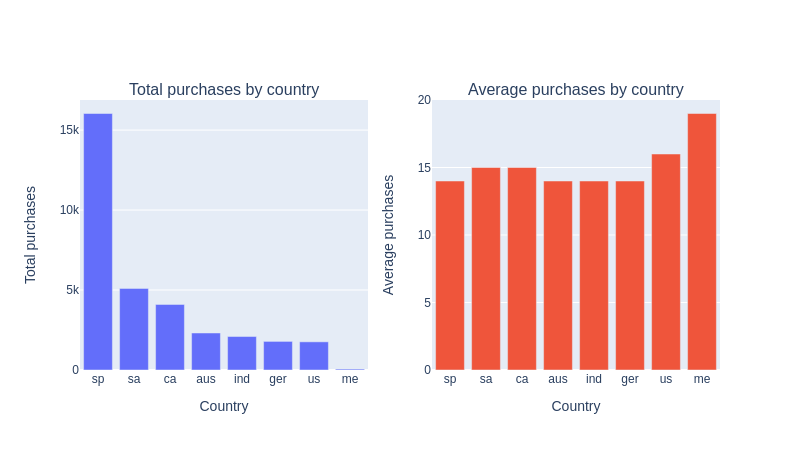

In [63]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Total purchases by country', 'Average purchases by country'))

fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['total_purchases']), row = 1, col = 1)
fig.add_trace(go.Bar(x = average_purchases_per_country['country'], y = average_purchases_per_country['purchases_per_customer']), row = 1, col = 2)

fig['layout']['xaxis']['title'] = 'Country'
fig['layout']['xaxis2']['title'] = 'Country'
fig['layout']['yaxis']['title'] = 'Total purchases'
fig['layout']['yaxis2']['title'] = 'Average purchases'

fig.update_layout(showlegend = False)

gitly.show(fig)

С точки зрения общего количества покупок США, похоже, не занимает лидирующее место. На самом деле он самый низкий (исключая ME из-за всего 3 записей). Однако, если мы посмотрим на покупки, сделанные на человека в стране, то США лидируют в чарте.

# Есть ли существенная связь между географическим регионом и успехом кампании?

Мы будем использовать критерий хи-квадрат, чтобы определить связь между двумя категориальными переменными, страной и acceptcmp. Начнем с определения нулевой и альтернативной гипотез.

Нулевая гипотеза H0: Две переменные, country и acceptcmp, не зависят друг от друга.

Альтернативная гипотеза H1: две переменные связаны друг с другом.

In [64]:
from scipy.stats import chi2_contingency

In [65]:
acceptedcmp1 = pd.crosstab(df['country'], df['acceptedcmp1'])

In [66]:
c, p, dof, expected = chi2_contingency(acceptedcmp1)

In [67]:
p

0.8736949588868972

In [68]:
acceptedcmp2 = pd.crosstab(df['country'], df['acceptedcmp2'])

In [69]:
c, p, dof, expected = chi2_contingency(acceptedcmp2)

In [70]:
p

0.5870888995252126

In [71]:
acceptedcmp3 = pd.crosstab(df['country'], df['acceptedcmp3'])

In [72]:
c, p, dof, expected = chi2_contingency(acceptedcmp3)

In [73]:
p

0.6385182178116886

In [74]:
acceptedcmp4 = pd.crosstab(df['country'], df['acceptedcmp4'])

In [75]:
c, p, dof, expected = chi2_contingency(acceptedcmp4)

In [76]:
p

0.4081803337237639

In [77]:
acceptedcmp5 = pd.crosstab(df['country'], df['acceptedcmp5'])

In [78]:
c, p, dof, expected = chi2_contingency(acceptedcmp5)

In [79]:
p

0.6032248086937475

In [80]:
acceptedcmp6 = pd.crosstab(df['country'], df['acceptedcmp6'])

In [81]:
c, p, dof, expected = chi2_contingency(acceptedcmp6)

In [82]:
p

0.07613726068845521

Результаты показывают, что между географическими регионами и успехом кампании нет существенной связи, при этом p-значение для всех стран во всех маркетинговых кампаниях превышает 0,05. Это указывает на недостаточность доказательств, чтобы отвергнуть нулевую гипотезу о том, что географические регионы не имеют отношения к успеху маркетинговой кампании.

Мы можем дополнительно проверить это, построив график уровня принятия кампании в разных странах.

In [83]:
acceptedcmp_by_country = df.groupby('country').agg(acceptedcmp1 = ('acceptedcmp1', 'mean'), 
                                                   acceptedcmp2 = ('acceptedcmp2', 'mean'),
                                                   acceptedcmp3 = ('acceptedcmp3', 'mean'),
                                                   acceptedcmp4 = ('acceptedcmp4', 'mean'),
                                                   acceptedcmp5 = ('acceptedcmp5', 'mean'),
                                                   acceptedcmp6 = ('acceptedcmp6', 'mean')).reset_index()

In [84]:
acceptedcmp_by_country

,country,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp6
0,aus,0.043750,0.000000,0.056250,0.037500,0.081250,0.143750
1,ca,0.067164,0.022388,0.067164,0.089552,0.078358,0.141791
2,ger,0.058333,0.016667,0.083333,0.091667,0.066667,0.141667
3,ind,0.047619,0.013605,0.088435,0.074830,0.040816,0.088435
4,me,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667
5,sa,0.059701,0.011940,0.062687,0.059701,0.062687,0.155224
6,sp,0.071298,0.014625,0.075868,0.081353,0.080439,0.160878
7,us,0.064220,0.000000,0.073394,0.055046,0.045872,0.119266


In [85]:
acceptedcmp_by_country = pd.melt(acceptedcmp_by_country.reset_index(), id_vars = 'country', value_vars = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp6'])

Из приведенной выше диаграммы видно, что уровень одобрения (%) каждой кампании в разных странах, как правило, довольно низок и довольно одинаков. Таким образом, это имеет смысл и еще раз подтверждает наш вывод о том, что «страна» не является важной характеристикой для прогнозирования успеха кампании.

Обратите внимание, что набор данных содержит только 3 точки данных о клиентах для Мексики, поэтому уровень одобрения кажется высоким (т. Е. Если 1 клиент принимает кампанию, показатель успеха уже будет на уровне 33%).

# 1. Какая маркетинговая кампания наиболее успешна?

In [86]:
accepted_cmp = pd.DataFrame(df[['acceptedcmp1', 
                                'acceptedcmp2', 
                                'acceptedcmp3', 
                                'acceptedcmp4', 
                                'acceptedcmp5', 
                                'acceptedcmp6']].mean() * 100, columns = ['accepted_(%)']).sort_values(by = 'accepted_(%)', ascending = False).reset_index()

In [87]:
accepted_cmp.reset_index(inplace = True)

In [88]:
accepted_cmp = accepted_cmp.rename(columns = {'index': 'marketing_campaign', 'level_0': 'index'})

In [89]:
accepted_cmp.set_index('index', inplace = True)

Основываясь на приведенной выше диаграмме, мы можем сделать вывод, что самая последняя кампания является самой успешной.

# 2. Как выглядит средний клиент этой компании?

2.1 Categorical features

2.1.1 Education

In [90]:
education = df.groupby('education').agg(count = ('education', 'count'))

In [91]:
education.assign(education = education.index.get_level_values('education'))

,count,education
education,,
basic,54,basic
master,571,master
phd,485,phd
undergraduate,1126,undergraduate


In [92]:
education.reset_index(inplace = True)

В целом, большинство клиентов имеют высшее образование (50,4%).

2.1.2 Семейный статус

In [93]:
marital_status = df.groupby('marital_status').agg(count = ('marital_status', 'count'))

In [94]:
marital_status.assign(marital_status = marital_status.index.get_level_values('marital_status'))

,count,marital_status
marital_status,,
divorced,231,divorced
married,864,married
single,486,single
together,578,together
widow,77,widow


In [95]:
marital_status.reset_index(inplace = True)

Почти 40% клиентов состоят в браке, 25,8% живут вместе, а 21,7% не замужем.

2.1.3 Country

In [96]:
country = df.groupby('country').agg(count = ('country', 'count'))

In [97]:
country.assign(country = country.index.get_level_values('country'))

,count,country
country,,
aus,160,aus
ca,268,ca
ger,120,ger
ind,147,ind
me,3,me
sa,335,sa
sp,1094,sp
us,109,us


In [98]:
country.reset_index(inplace = True)

Почти половина клиентов из Испании. Следующим по величине пулом клиентов является ЮАР (Южная Африка) с 15%, затем следует третья СА (Канада) с 12%.

2.1.4 Dependents

In [99]:
dependents = df[['kidhome', 'teenhome']].value_counts().reset_index()

In [100]:
dependents['index'] = np.arange(1, dependents.shape[0] + 1)

In [101]:
dependents = dependents.set_index('index')

In [102]:
dependents['kidhome'] = dependents['kidhome'].astype('string') + 'kid' 

In [103]:
dependents['kidhome'] = dependents['kidhome'].replace(to_replace = r'(kid)', value = r' \1', regex = True)

In [104]:
dependents['teenhome'] = dependents['teenhome'].astype('string') + 'teen' 

In [105]:
dependents['teenhome'] = dependents['teenhome'].replace(to_replace = r'(teen)', value = r' \1', regex = True)

In [106]:
dependents['dependenthome'] = dependents['kidhome']  + ' & ' + dependents['teenhome']

In [107]:
dependents = dependents.rename(columns = {0: 'count'})

* Только у 28,5% клиентов нет детей (хотя бы ребенок или подросток в семье).

* 71,5% клиентов имеют в семье хотя бы 1 ребенка или 1 подростка.

2.2 Numerical features

In [108]:
numerical_features = pd.DataFrame((df[['age', 'income']].mean()))

In [109]:
numerical_features = numerical_features.rename(columns = {0: 'numerical_feature'})

In [110]:
numerical_features

,numerical_feature
age,53.101968
income,51958.810579


Средний покупатель...

* 53 года
* из Испании
* высшее образование
* зарабатывает около 52 000 долларов США
* состоит в отношениях, т.е. состоит в браке или вместе
* имеет по крайней мере ребенка (ребенка или подростка)

In [111]:
df.columns


Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'acceptedcmp6', 'complain', 'country', 'age', 'enrollment_month'],
      dtype='object')

In [112]:
 !pip install PyMySQL
 !pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.5 MB 1.6 MB/s 


In [113]:
import sqlalchemy
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
dependents.to_sql(con=database_connection, name='lab4_dependents', if_exists='replace')

In [114]:
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
country.to_sql(con=database_connection, name='lab4_country', if_exists='replace')

In [115]:
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
marital_status.to_sql(con=database_connection, name='lab4_marital_status', if_exists='replace')

In [116]:
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
accepted_cmp.to_sql(con=database_connection, name='lab4_accepted_cmp', if_exists='replace')

In [117]:
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
average_purchases_per_country.to_sql(con=database_connection, name='lab4_average_purchases_per_country', if_exists='replace')

In [118]:
database_username = 'MGPU_ADEU_105'
database_password = '15911721'
database_ip       = '95.131.149.21'
database_name     = 'MGPU_ADEU_105'
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.format(database_username, database_password, database_ip, database_name))
df.to_sql(con=database_connection, name='lab4_df', if_exists='replace')